## Test Sentence BERT to regroup transitions and see if clusters appear

In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans, DBSCAN

/home/guillaumelevy/Documents/WorldLLM/.venv/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
plants = ['carrot', 'potato', 'beet', 'berry', 'pea']
small_herbi = ['pig', 'cow', "sheep"]
big_herbi = ['elephant', 'giraffe', 'rhinoceros']

all_combi = []
for plant in plants:
    all_combi.extend([plant, plant +" seed"])
for animal in small_herbi+big_herbi:
    all_combi.extend([animal, "baby " + animal])


In [3]:
transition_type_to_obs = {
        "standing": "You are standing on the {0}.",
        "holding1": "You are holding the {0}.",
        "holding2": "You are holding the {0} and the {1}.",
        "transformBH": "The {0} appears from the transformation.",
        "transformP": "The {0} appears from the transformation.",
        "transformSH": "The {0} appears from the transformation.",
    }
all_sentences = {transition_type: [] for transition_type in transition_type_to_obs}
labels_per_animal = []
for transition_type in transition_type_to_obs:
    if transition_type == "holding2":
        continue
        for incr,combi1 in enumerate(all_combi):
            for combi2 in all_combi:
                labels_per_animal.append(incr)
                all_sentences[transition_type].append(transition_type_to_obs[transition_type].format(combi1, combi2))
    else:
        for incr,combi in enumerate(all_combi):
            labels_per_animal.append(incr)
            all_sentences[transition_type].append(transition_type_to_obs[transition_type].format(combi))

In [4]:
all_sentences_flat = []
labels = []
labels_id = []
for incr,transition_type in enumerate(all_sentences):
    all_sentences_flat.extend(all_sentences[transition_type])
    labels.extend([transition_type for _ in all_sentences[transition_type]])
    labels_id.extend([incr for _ in all_sentences[transition_type]])

In [5]:
# K-means clustering
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(all_sentences_flat)

/home/guillaumelevy/Documents/WorldLLM/.venv/lib/python3.10/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [6]:
# Plot TSNE of the embeddings
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X_embedded = TSNE(n_components=2).fit_transform(embeddings)

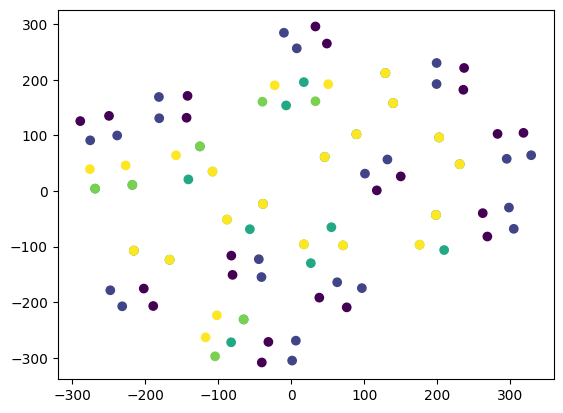

In [8]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels_id)
plt.show()